<a href="https://colab.research.google.com/github/dinithprimal/MachineLearning-HandsOn/blob/main/Multiple_Variable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

<a name="toc_15456_2"></a>
# 2 Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  
|

In [5]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [6]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type: {type(X_train)}")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type: {type(y_train)}")
print(y_train)

X Shape: (3, 4), X Type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type: <class 'numpy.ndarray'>
[460 232 178]


In [8]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")
print(w_init)

w_init shape: (4,), b_init type: <class 'float'>
[  0.39  18.75 -53.36 -26.42]


In [9]:
def predict_single_loop(x, w, b):
  """
  single predict using linear regression

  Args:
    x (ndarray):  shape (n,) exmple with multiple features
    w (ndarray):  shape (n,) model parameters
    b (scaler):   model parameters

  Returns:
    p (scaler):   prediction
  """
  n = x.shape[0]
  p = 0
  for i in range(n):
    p_i = x[i] * w[i]
    p = p + p_i
  p = p + b
  return p

In [10]:
# get a row from the training data
x_vec = X_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (4,), x_vec value: [2104    5    1   45]
f_wb shape: (), prediction: 459.9999976194083


In [22]:
def predict(x, w, b):
  """
  single predict using linear regression
  Args:
    x (ndarray):  shape (n,) example with multiple features
    w (ndarray):  shape (n,) model parameters
    b (scaler):   model parameters

  Returns:
    p (scalar):   prediction
  """
  p = np.dot(x, w) + b
  return p

In [23]:
# get a row from training set
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, predict: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), predict: 459.9999976194083


In [28]:
def compute_cost(X, y, w, b):
  """
  Compute cost
  Args:
    X (ndarray (m, n)):   Data, m examales with n features
    y (ndarray (m,)):     trget values
    w (ndarray (n,)):     model parameters
    b (scaler):           model parameter

  Returns:
    cost (scalar):    cost
  """
  m = X.shape[0]
  cost = 0.0
  for i in range(m):
    f_wb_i = np.dot(X[i], w) + b
    cost = cost + (f_wb_i - y[i])**2
  cost = cost / (2 * m)
  return cost

In [29]:
# Compute and display cost using pre-chosen optimal parameters
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at optimal w : {cost}")

Cost at optimal w : 1.5578904428966628e-12


<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [34]:
def compute_gradient(X, y, w, b):
  """
  Computes the gradient for linear regression
  Args:
    X (ndarray (m,n)):    Data, m examples with n features
    y (ndarray (m,)):     target values
    w (ndarray (n,)):     model parameters
    b (scaler):           model parameter
  
  Returns:
    dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w
    dj_db (scaler):       The gradient of the cost w.r.t. the parameter b
  """
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    err = (np.dot(X[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * X[i, j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_db, dj_dw

In [35]:
# Compute and display graient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f"dj_db at initial w, b: {tmp_dj_db}")
print(f"dj_dw at initial w, b: \n   {tmp_dj_dw}")

dj_db at initial w, b: -1.6739251501955248e-06
dj_dw at initial w, b: 
   [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [36]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
  """
  Perform batch gradient decent to learn w and b. Updates w and b by taking
  num_inters gradient steps with learining rate alpha

  Args:
    X (ndarray (m,n))   :   Data, m examples with n features
    y (ndarray (m,))    :   target values
    w_in (ndarray (n,)) :   initial model parameters
    b_in (scaler)       :   initial model parameter
    cost_function       :   function to compute cost
    gradient_function   :   function to compute the gradient
    alpha (float)       :   Learing rate
    num_iters (int)     :   number of iterations to run gradient descent

  Returns:
    w (ndarray (n,))    :   Updated values of parameters
    b (scaler)          :   Updated value of parameter
  """

  # An array to store cost J and w's at each iteration primarily for graphing later
  j_history = []
  w = copy.deepcopy(w_in) # avoid modifying global w within function
  b = b_in

  for i in range(num_iters):

    # Calculate the gradient and update the parameters
    dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

    # Update parameters using w, b alpha and gradient
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    # Save cost J at each iteration
    if i<100000:     # Prevent resource exhaustion
      j_history.append(cost_function(X, y, w, b))

    # Print cost every at interval 10 times or as many interations if < 10
    if 1% math.ceil(num_iters / 10) == 0:
      print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f} ")

  return w, b, j_history  # Returns final w, b and j history for graphing

In [37]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# Some gradient descent setings
iterations = 1000
alpha = 5.0e-7

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient,
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final}")
m,_ = X_train.shape
for i in range(m):
  print(f"Prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.00, [ 0.2   0.   -0.01 -0.07]
Prediction: 426.19, target value: 460
Prediction: 286.17, target value: 232
Prediction: 171.47, target value: 178


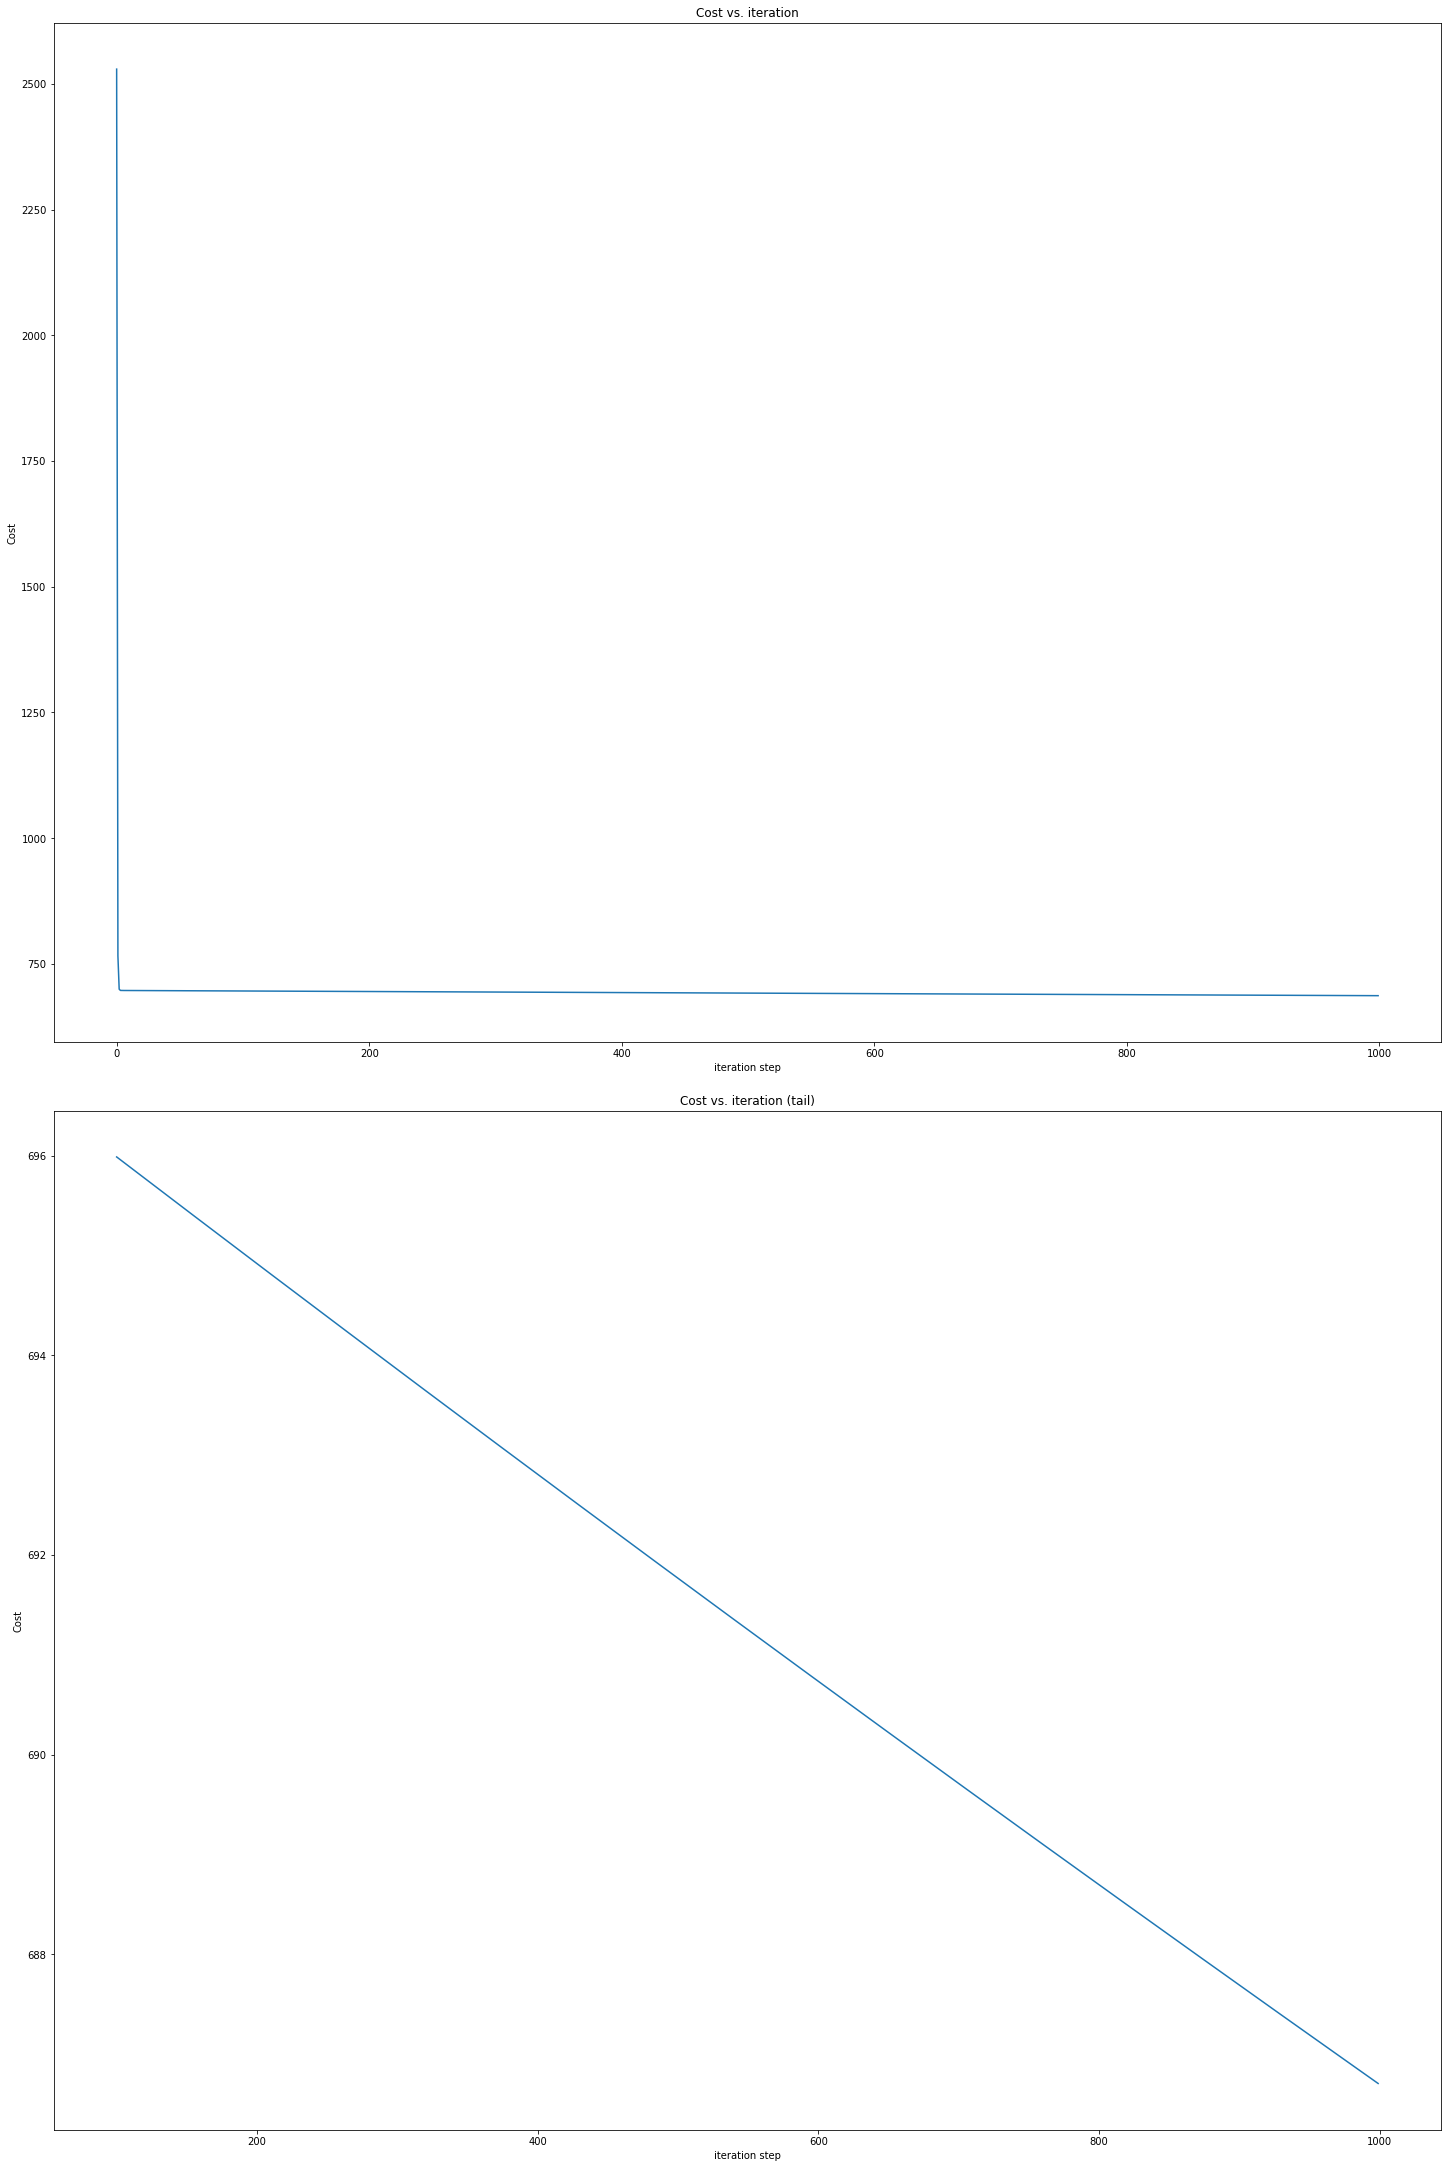

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, figsize=(20, 30))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()